In [2]:
import pandas as pd
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [3]:
df = pd.read_csv("Social_Network_Ads.csv")

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

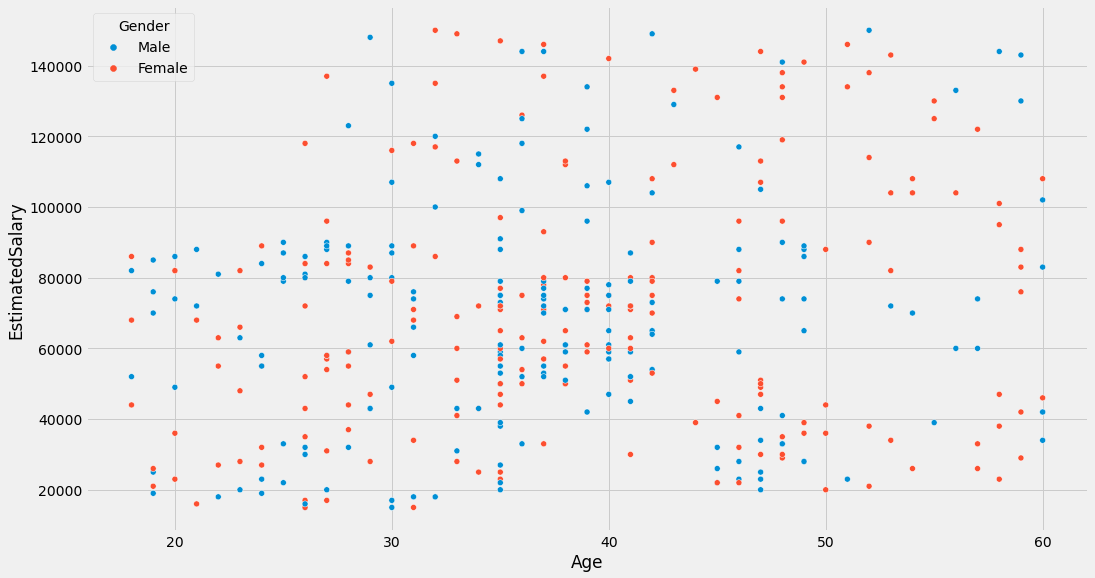

In [11]:
import seaborn as sns
plt.figure(figsize = (16, 9))
sns.scatterplot(data=df, x="Age", y="EstimatedSalary", hue = "Gender")

AttributeError: 'PathCollection' object has no property 'hue'

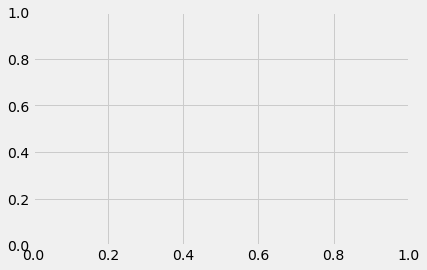

In [8]:
plt.scatter(df["Age"], df["EstimatedSalary"], cmap = 'summer', edgecolor='black', linewidth=1, hue = df["Gender"])

cbar = plt.colorbar()
cbar.set_label('Like/Dislike Ratio')

plt.xscale('log')
plt.yscale('log')

plt.title('Age vs Salary')
plt.xlabel('Ages')
plt.ylabel('Salaries')



plt.tight_layout()
plt.show

In [6]:
df.

(400, 3)

In [16]:
df1 = pd.read_csv("Social_Network_Ads.csv", usecols = ["Age", "EstimatedSalary"])

In [17]:
df1.to_csv("DATA.csv", index=False, header = False)

In [18]:
df2 = pd.read_csv("DATA.csv")
df2.head()

,19,19000
0,35,20000
1,26,43000
2,27,57000
3,19,76000
4,27,58000


In [13]:
df[["Age", "EstimatedSalary"]]

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [20]:
g=nx.read_edgelist('DATA.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
#printing the information of graph
print(nx.info(g))

DiGraph with 160 nodes and 365 edges


DiGraph with 160 nodes and 365 edges


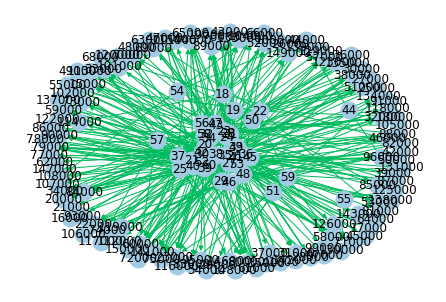

In [17]:
subgraph=nx.read_edgelist('DATA.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
#plotting the graph
pos=nx.spring_layout(subgraph)
nx.draw(subgraph,pos,node_color='#A0CBE2',edge_color='#00bb5e',width=1,edge_cmap=plt.cm.Blues,with_labels=True)
plt.savefig("graph_sample.pdf")
print(nx.info(subgraph))

DiGraph with 160 nodes and 365 edges


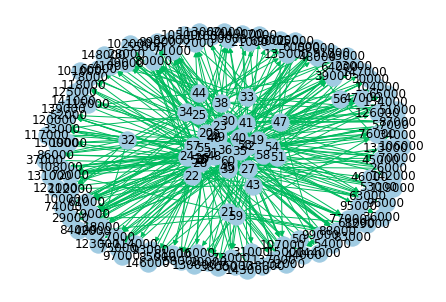

In [21]:
subgraph=nx.read_edgelist('DATA.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
#plotting the graph
pos=nx.spring_layout(subgraph)
nx.draw(subgraph,pos,node_color='#A0CBE2',edge_color='#00bb5e',width=1,edge_cmap=plt.cm.Blues,with_labels=True)
plt.savefig("graph_sample.pdf")
print(nx.info(subgraph))

In [22]:
G1 =nx.read_edgelist("DATA.csv", create_using = nx.Graph(), nodetype=int)

Graph with 160 nodes and 365 edges


In [13]:
G1 =nx.read_edgelist("socio.txt", create_using = nx.Graph(), nodetype=int)

(-1.1890855819061492,
 0.9899006476789978,
 -0.8752287409992945,
 0.9644791531920254)

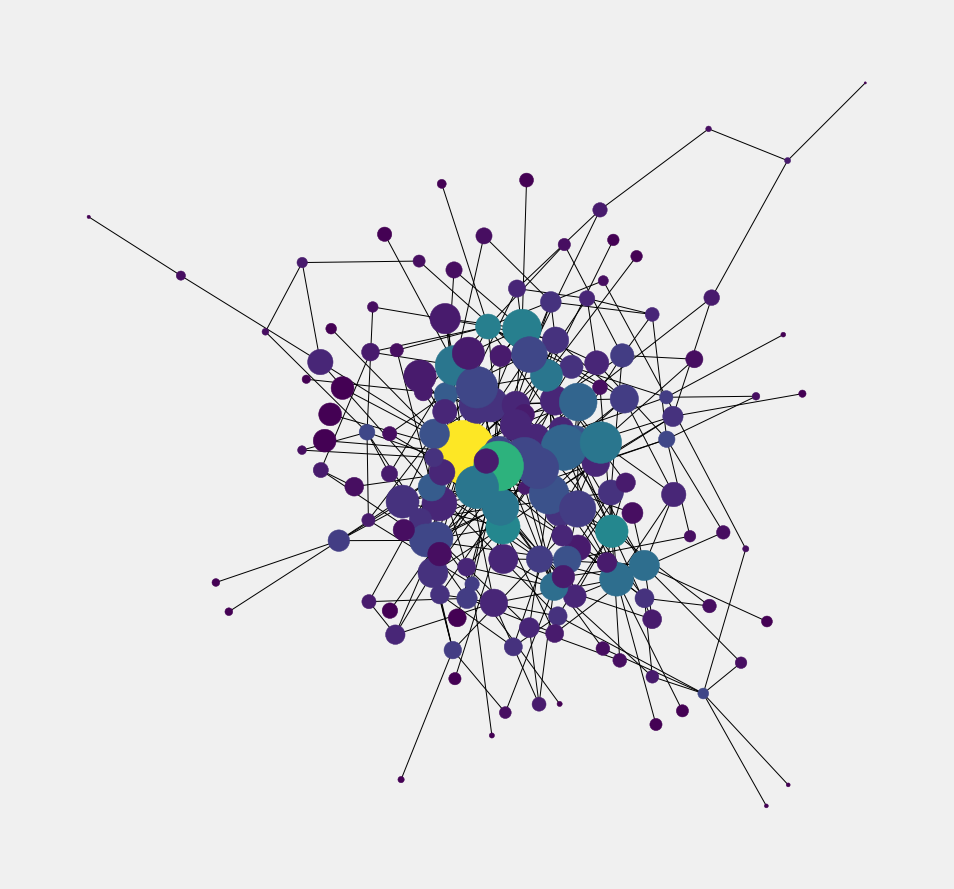

In [15]:
pos = nx.spring_layout(G1)
eigCent = nx.eigenvector_centrality(G1)
node_color = [20000.0 * G1.degree(v) for v in G1]
node_size =  [v * 10000 for v in eigCent.values()]
plt.figure(figsize=(15,15))
nx.draw_networkx(G1, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

In [26]:
print(nx.info(G1))

Graph with 160 nodes and 365 edges


In [12]:
pos = nx.spring_layout(G1)
betCent = nx.betweenness_centrality(G1, normalized=True, endpoints=True)
node_color = [20000.0 * G1.degree(v) for v in G1]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G1, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')
sorted(betCent, key=betCent.get, reverse=True)[:5]

NameError: name 'G1' is not defined

[35, 37, 26, 47, 48]

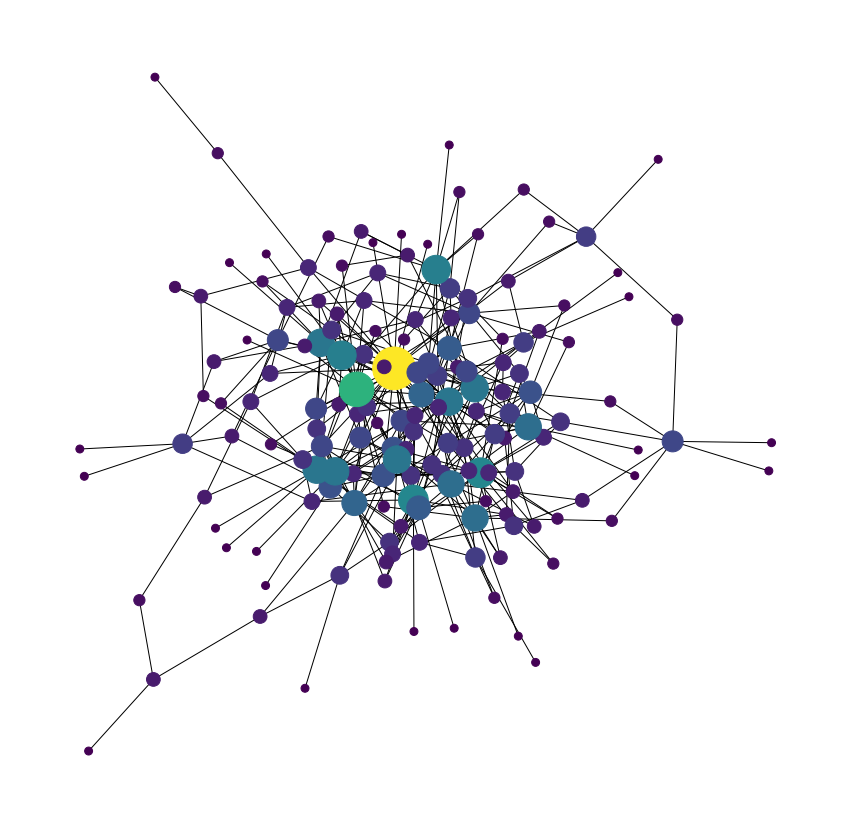

In [28]:
pos = nx.spring_layout(G1)
degCent = nx.degree_centrality(G1)
node_color = [20000.0 * G1.degree(v) for v in G1]
node_size =  [v * 10000 for v in degCent.values()]
plt.figure(figsize=(15,15))
nx.draw_networkx(G1, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

sorted(degCent, key=degCent.get, reverse=True)[:5]

In [29]:
sorted(degCent, key=degCent.get, reverse=True)[:5]

[35, 37, 26, 47, 48]

[35, 79000, 37, 72000, 46]

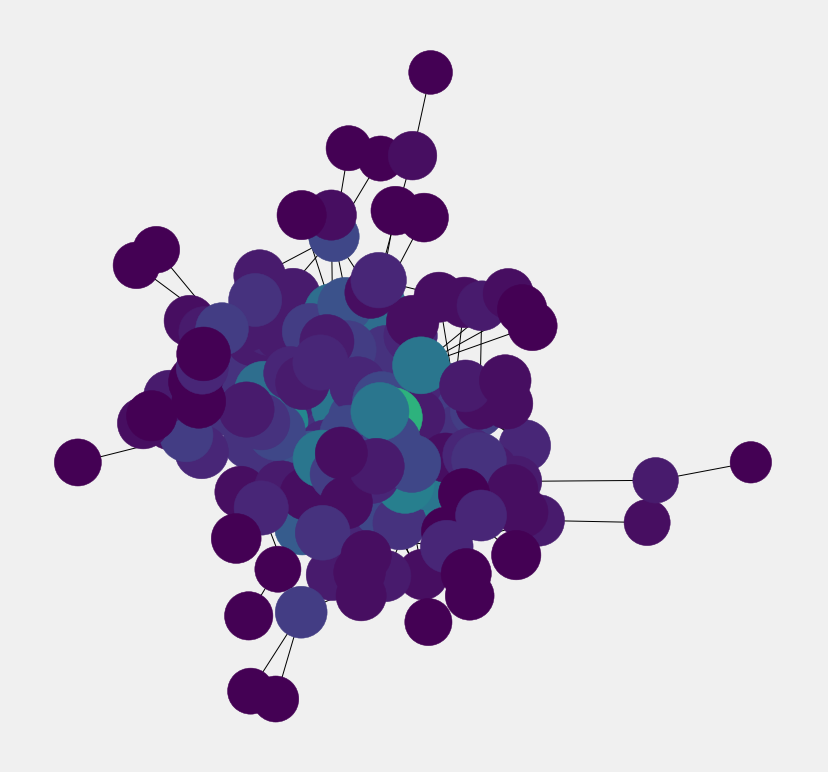

In [16]:
pos = nx.spring_layout(G1)
cloCent = nx.closeness_centrality(G1)
node_color = [20000.0 * G1.degree(v) for v in G1]
node_size =  [v * 10000 for v in cloCent.values()]
plt.figure(figsize=(13,13))
nx.draw_networkx(G1, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')
sorted(cloCent, key=cloCent.get, reverse=True)[:5]

In [31]:
max(x for x,y in nx.degree(G1))

150000

In [33]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [35]:
sources = [19]
targets = [1900] 
for i in range(4):
    path = nx.shortest_path(G1,source=sources[i],target=targets[i])
    length = nx.shortest_path_length(G1,source=sources[i],target=targets[i],method='dijkstra')
    print("Shortest Path between Node ", str(sources[i])," ---> ", str(targets[i]), " is ",
          str(path), " ,Length = ", str(length))

NodeNotFound: Either source 19 or target 1900 is not in G

(-0.9081803316123722,
 1.1127791051392522,
 -0.9667752643405068,
 1.1868881472902744)

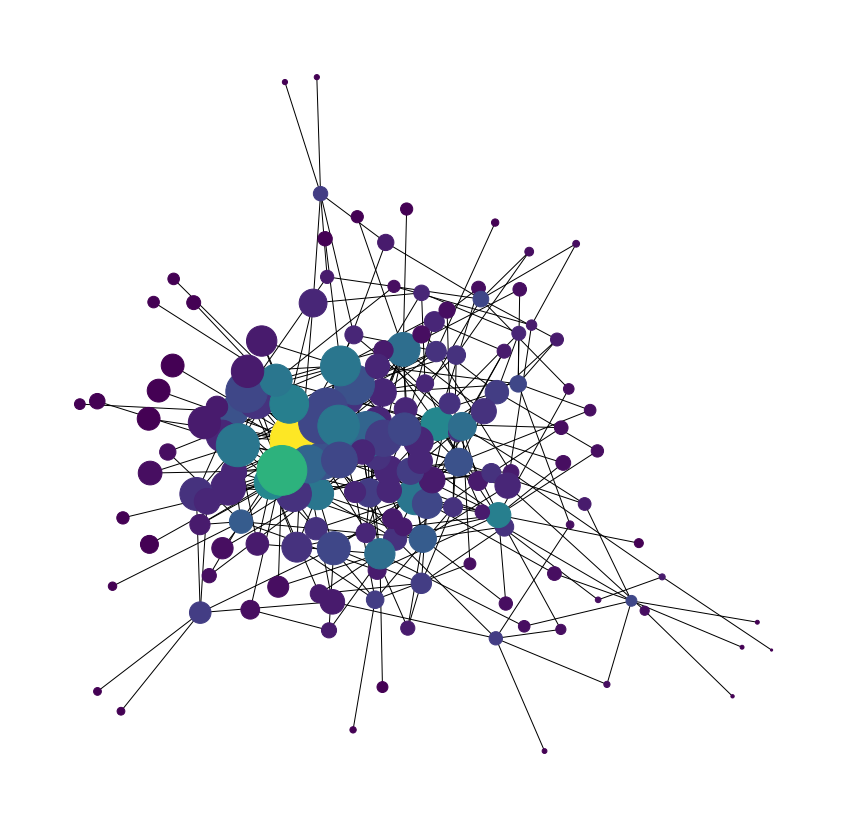

In [36]:
#pos = nx.spring_layout(G1)
eigCent = nx.eigenvector_centrality(G1)
node_color = [20000.0 * G1.degree(v) for v in G1]
node_size =  [v * 10000 for v in eigCent.values()]
plt.figure(figsize=(15,15))
nx.draw_networkx(G1, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

The objective of this analysis is to predict whether a person will buy a product displayed on a social network ad or not, given their age, gender and salary and to compare the accuracy of different classification algorithms.

# EDA

In [84]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc

plt.style.use("fivethirtyeight")

In [83]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [86]:
dataset = pd.read_csv("Social_Network_Ads.csv")

In [87]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


The set has:

* Id column
* Gender: Categorical column (Male/Female)
* Numerical features: Age and Estimated Salary

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


* There are 400 people analyzed.
* The age goes from 18 to 60 years.
* The salary goes from 15000 USD to 150000 USD per year.

In [41]:
# Any cols mission value
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### Let's see how gender, salary and age are distributed

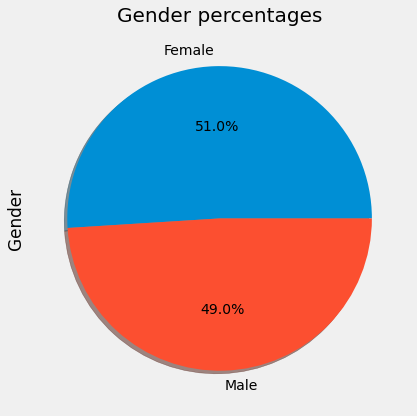

In [44]:
dataset['Gender'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(6,6))
plt.title('Gender percentages', fontsize = 20)
plt.tight_layout()
plt.show()

C:\Users\amira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


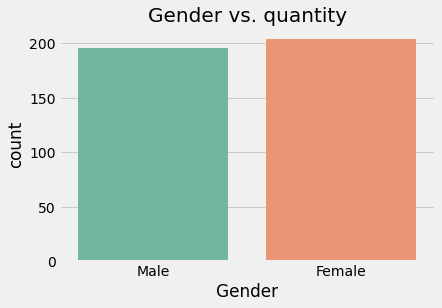

In [47]:
sns.countplot(dataset['Gender'], palette = 'Set2')
plt.title ('Gender vs. quantity', fontsize = 20)
plt.show()

C:\Users\amira\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


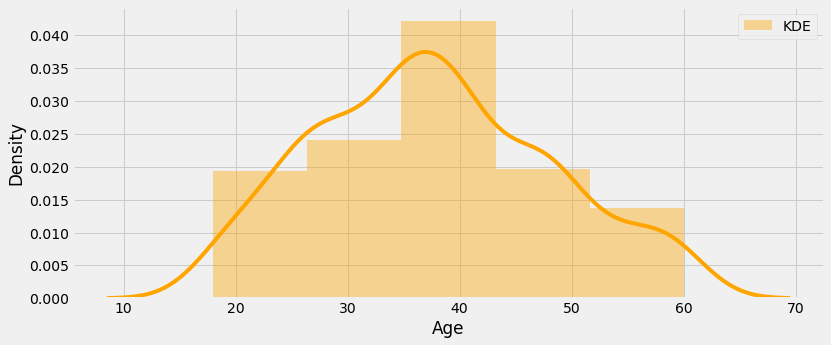

In [48]:
sns.distplot(dataset['Age'], bins = 5, color = 'orange', label = 'KDE')
plt.legend()
plt.gcf().set_size_inches(12, 5)

Age is normally distributed around 37 years, and most of the people studied are from 35 to 45 years.

In [49]:
# Let's see how age is distributed per gender

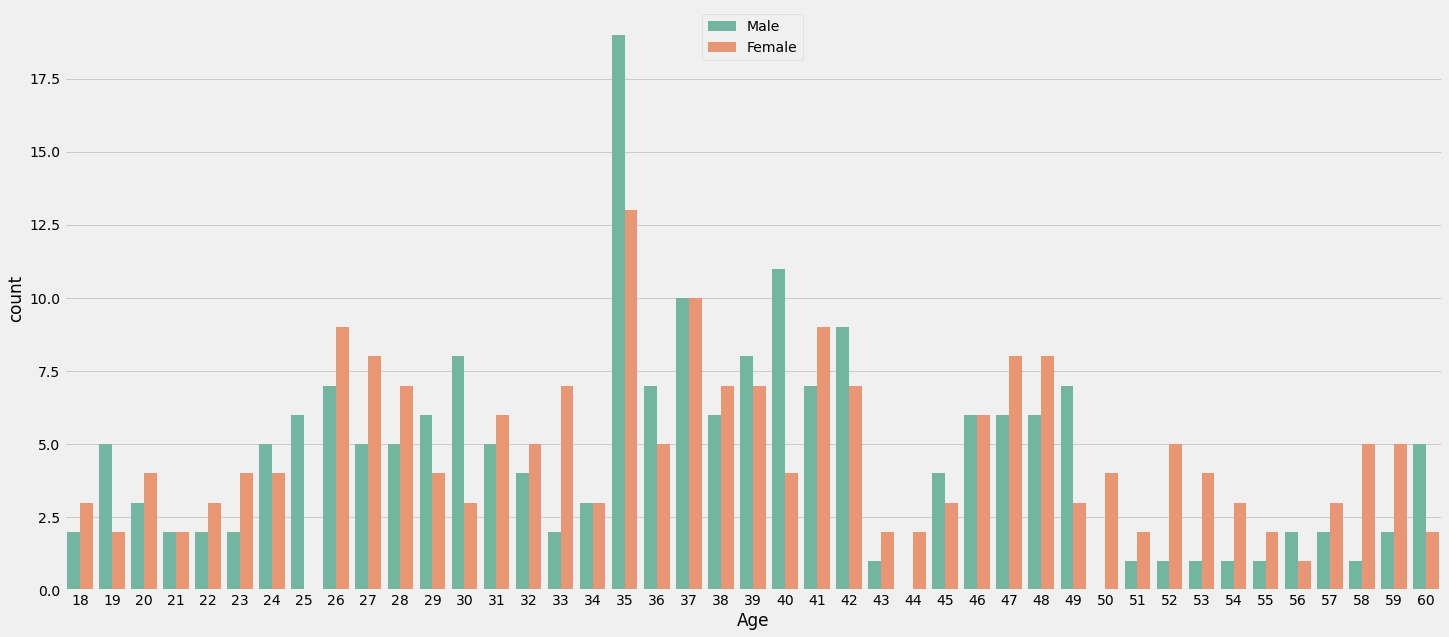

In [50]:
plt.figure(figsize = (22,10))
sns.countplot(x = 'Age',data = dataset , hue='Gender', palette = 'Set2')
plt.legend(loc='upper center')
plt.show()

There seems to be equal analyzed people per gender per age, seeing only more men of 35 years.

In [51]:
tag1 = 'Male'
tag2 = 'Female'
Male = dataset[dataset["Gender"] == tag1][['Age','EstimatedSalary']]
Female = dataset[dataset["Gender"] == tag2][['Age','EstimatedSalary']]

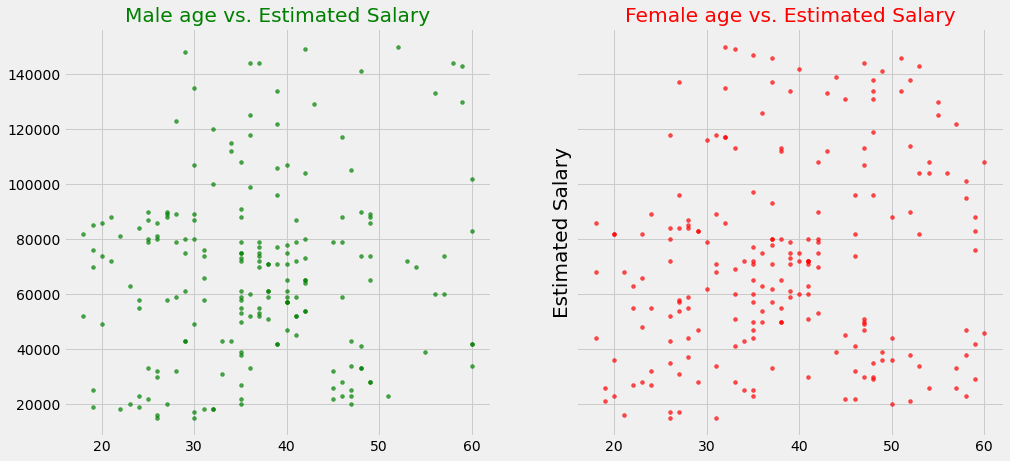

In [52]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey = True)

ax1.scatter(Male.Age, Male.EstimatedSalary, c = 'green', s = 15, alpha = 0.7)
ax1.set_title('Male age vs. Estimated Salary', c = 'green')
ax2.scatter(Female.Age, Female.EstimatedSalary, c='red', s = 15, alpha = 0.7)
ax2.set_title('Female age vs. Estimated Salary', c ='red')
plt.gcf().set_size_inches(15, 7)

plt.ylabel('Estimated Salary', fontsize = 20)

plt.show()

Conclusion: There is no correlation between the estimated salary of a male or female with their age.

Statistics for purchased column

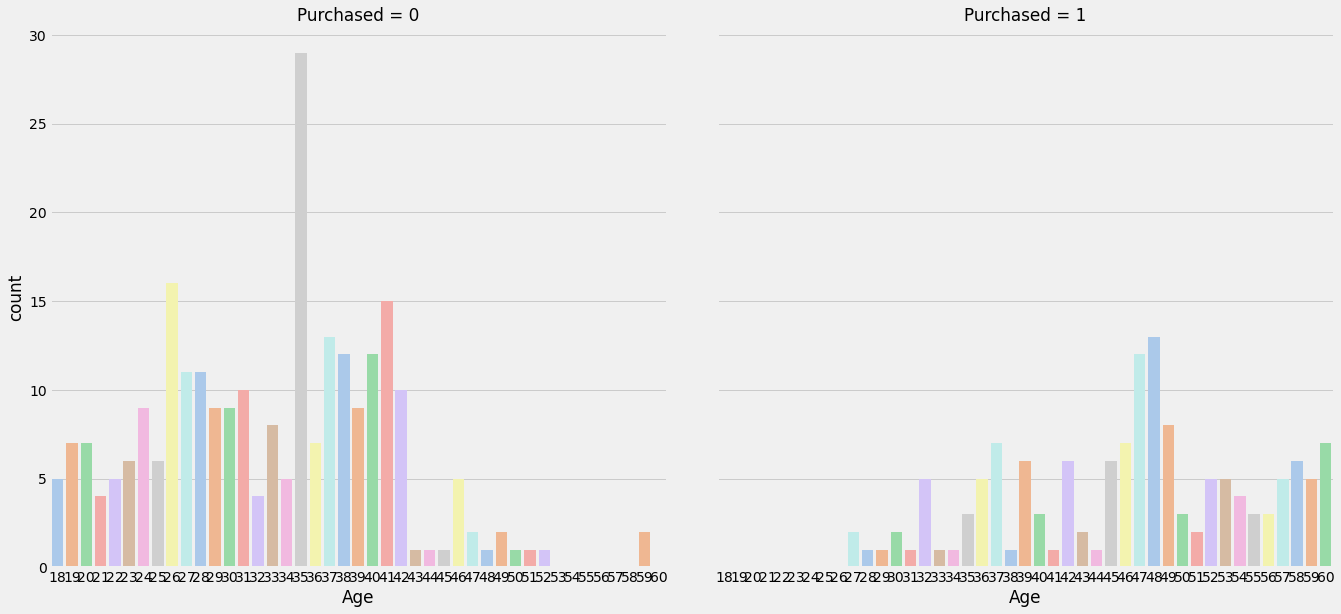

In [55]:
sns.catplot(x="Age", col = 'Purchased', data=dataset, kind = 'count', palette='pastel')
plt.gcf().set_size_inches(20, 10)
#plt.gcf().autofmt_xdate()
plt.show()

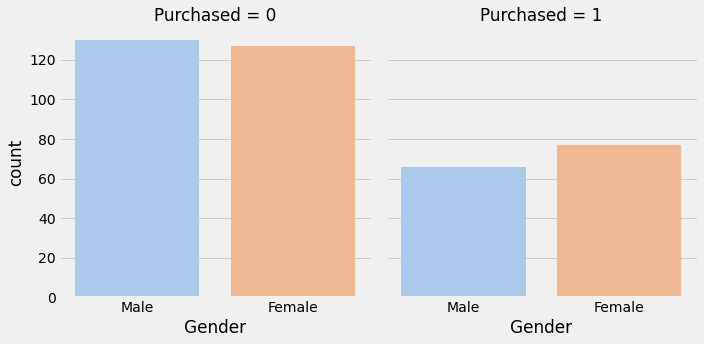

In [56]:
sns.catplot(x="Gender", col = 'Purchased', data=dataset, kind = 'count', palette='pastel')
plt.show()

Conclusions:

* The product seem to be intended for people within the range of 50 - 60 years, and it also seems to be intended both for male and Female gender.
* As we saw on the Age vs Salary plots, it seems that the women analyzed have higher income than men, so this might be a reason for the slight difference between gender in purchased or not terms.

## Feature Engineering

First let´s drop the ID column as it doesn't give any information.

In [62]:
dataset2 = dataset.copy()
dataset2 = dataset2.drop(['User ID'], axis = 1)

In [63]:
X = dataset2.iloc[:, 0:3]
y = dataset2.iloc[:, -1]

In [64]:
X

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000
...,...,...,...
395,Female,46,41000
396,Male,51,23000
397,Female,50,20000
398,Male,36,33000


In [66]:
X = pd.get_dummies(X)
X = X[['Gender_Male','Gender_Female','Age','EstimatedSalary']]
X = X.drop(['Gender_Male'], axis = 1)

In [67]:
X

,Gender_Female,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000
...,...,...,...
395,1,46,41000
396,0,51,23000
397,1,50,20000
398,0,36,33000


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Male = 0, Female = 1

Feature Scaling

In [75]:
sc_X = MinMaxScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [76]:
X_train

array([[0.        , 0.95238095, 0.95555556],
       [1.        , 0.97619048, 0.5037037 ],
       [1.        , 0.14285714, 0.2962963 ],
       [1.        , 0.19047619, 0.14814815],
       [1.        , 0.95238095, 0.17037037],
       [1.        , 0.57142857, 0.48148148],
       [1.        , 0.52380952, 0.44444444],
       [0.        , 0.97619048, 0.85185185],
       [1.        , 0.66666667, 0.19259259],
       [1.        , 0.54761905, 0.33333333],
       [0.        , 0.57142857, 0.36296296],
       [1.        , 0.45238095, 0.97037037],
       [1.        , 0.11904762, 0.24444444],
       [0.        , 0.16666667, 0.13333333],
       [0.        , 0.14285714, 0.51111111],
       [1.        , 0.21428571, 0.6       ],
       [0.        , 0.11904762, 0.35555556],
       [0.        , 0.71428571, 0.13333333],
       [0.        , 0.71428571, 0.55555556],
       [0.        , 0.57142857, 0.65925926],
       [1.        , 0.61904762, 0.17777778],
       [0.        , 0.33333333, 0.77777778],
       [1.

In [77]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [78]:
y_pred = classifier.predict(X_test)

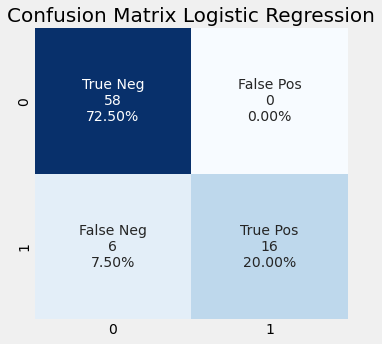

In [79]:
cm = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot = labels, fmt = '', cmap = 'Blues', cbar = False)
plt.gcf().set_size_inches(5, 5)
plt.title('Confusion Matrix Logistic Regression', fontsize = 20)
plt.show()

In [80]:
accuracy_LR = accuracy_score(y_test,y_pred) *100
print('The accuracy of the logistic regression is: ' +str(accuracy_LR) + ' %.')

The accuracy of the logistic regression is: 92.5 %.


In [81]:
def clf_model(model):
    clf = model
    clf.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, clf.predict(X_test).round())
    return clf, accuracy

In [85]:
model_performance = pd.DataFrame(columns = ["Model", "Accuracy"])

models_to_evaluate = [RandomForestClassifier(n_estimators=1000), KNeighborsClassifier(n_neighbors = 7, metric = "minkowski", p = 2),
                      SVC(kernel = 'rbf'), GaussianNB(), GradientBoostingRegressor(n_estimators=300, learning_rate=0.01), 
                     AdaBoostClassifier(n_estimators=300, learning_rate=0.01), XGBClassifier(n_estimators=300, learning_rate=0.01)]

for model in models_to_evaluate:
    clf, accuracy = clf_model(model)
    model_performance = model_performance.append({"Model": model, "Accuracy": accuracy}, ignore_index=True)

model_performance

,Model,Accuracy
0,"(DecisionTreeClassifier(max_features='sqrt', r...",0.9375
1,KNeighborsClassifier(n_neighbors=7),0.9500
2,SVC(),0.9375
3,GaussianNB(),0.9250
4,([DecisionTreeRegressor(criterion='friedman_ms...,0.9375
5,"(DecisionTreeClassifier(max_depth=1, random_st...",0.9375
6,"XGBClassifier(base_score=None, booster=None, c...",0.9500
